In [7]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
import pandas as pd
import math
%matplotlib inline

In [8]:
# Read Text File in Python
# File 1 all simulations 
Filename = "RPM_dakota_SY_2.dat"  #"RPM_dakota_w.dat"
DF = pd.read_csv(Filename,sep = "\s+|\t+|\s+\t+|\t+\s+",engine='python')
DF.head()

,eval_id,interface,FR,K,Y,rmse,CRNrmse
0,1,NO_ID,2.000000,-3.000000,-1.400000,2.76537,2032.49
1,2,NO_ID,2.291669,-3.092051,-1.310707,4.20801,2313.92
2,3,NO_ID,1.641706,-2.478398,-1.588790,1.42784,1000.27
3,4,NO_ID,1.855062,-2.408226,-1.382437,2.53311,1460.91
4,5,NO_ID,1.465107,-1.623029,-0.966321,4.85714,1642.89


In [9]:
# mask RMSE values > 10^10 / 1 in this case (< 10.**10.)
DFm = DF.where(DF.rmse < 99999)
DFm.head()

,eval_id,interface,FR,K,Y,rmse,CRNrmse
0,1.0,NO_ID,2.000000,-3.000000,-1.400000,2.76537,2032.49
1,2.0,NO_ID,2.291669,-3.092051,-1.310707,4.20801,2313.92
2,3.0,NO_ID,1.641706,-2.478398,-1.588790,1.42784,1000.27
3,4.0,NO_ID,1.855062,-2.408226,-1.382437,2.53311,1460.91
4,5.0,NO_ID,1.465107,-1.623029,-0.966321,4.85714,1642.89


In [10]:
# Read Text File in Python
# File 2 just accepted simulations 
Filename2 = "posterior.dat"  
DF2 = pd.read_csv(Filename2,sep = "\s+|\t+|\s+\t+|\t+\s+",engine='python')
DF2.head()

,mcmc_id,interface,FR,K,Y,rmse,CRNrmse
0,1,NO_ID,2.000000,-3.000000,-1.40000,2.76537,2032.49
1,2,NO_ID,2.000000,-3.000000,-1.40000,2.76537,2032.49
2,3,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27
3,4,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27
4,5,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27


In [11]:
# mask RMSE values > 10^10 / 1 in this case (< 10.**10.)
DF2m = DF2.where(DF2.rmse < 99999)
DF2m.head()

,mcmc_id,interface,FR,K,Y,rmse,CRNrmse
0,1,NO_ID,2.000000,-3.000000,-1.40000,2.76537,2032.49
1,2,NO_ID,2.000000,-3.000000,-1.40000,2.76537,2032.49
2,3,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27
3,4,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27
4,5,NO_ID,1.641706,-2.478398,-1.58879,1.42784,1000.27


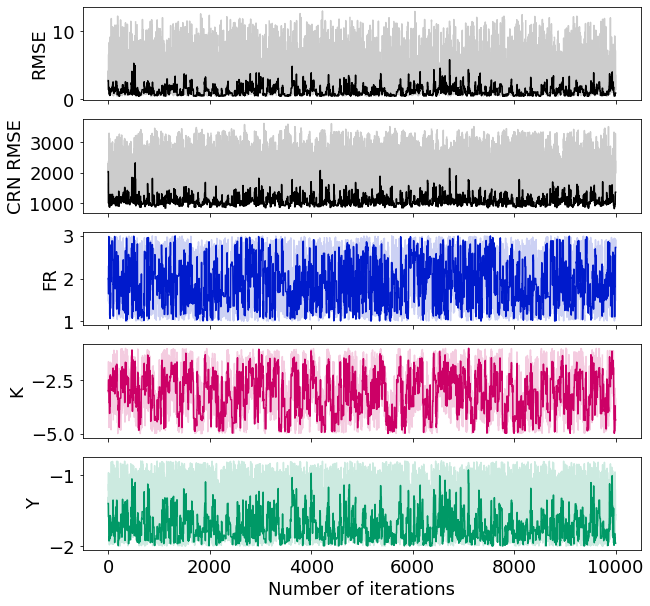

In [12]:
#set up figure
fig = plt.figure(1,figsize=(10,10))

# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=18)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 5

ax1 = plt.subplot(511) 
ax2 = plt.subplot(512, sharex=ax1)
ax3 = plt.subplot(513, sharex=ax1)
ax4 = plt.subplot(514, sharex=ax1)
ax5 = plt.subplot(515, sharex=ax1)

#plot all RMSE ax1
ax1.plot(DFm.eval_id,DFm.rmse, color=[0,0,0,0.2])
#plot accepted RMSE
ax1.plot(DF2m.mcmc_id, DF2m.rmse, color=[0,0,0,1])
plt.setp(ax1.get_xticklabels(), visible=False)

#plot inset for burn in period
#axins = inset_axes(ax1, width="30%", height="40%", loc=1, borderpad=1.5)
#axins.plot(DF2m.mcmc_id, DF2m.rmse,color=[0,0,0,1])
#axins.set_xlim(0., 100)

#set up rmse subplot 
#ax1.set_yscale('log')
#ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("RMSE")


#plot all CRN rmse ax2
#ax1 = plt.subplot(sharex = ax1)
ax2.plot(DFm.eval_id,DFm.CRNrmse,color=[0,0,0,0.2])
#plot accepted CRN RMSE
ax2.plot(DF2m.mcmc_id, DF2m.CRNrmse, color=[0,0,0,1])
plt.setp(ax2.get_xticklabels(), visible=False)

#plot inset for burn in period
#ax2ins = inset_axes(ax2, width="30%", height="40%", loc=1, borderpad=1.5)
#ax2ins.plot(DF2m.mcmc_id, DF2m.CRNrmse,color=[0,0,0,1])
#ax2ins.set_xlim(0., 100)

#set up CRN rmse subplot
#ax2.set_yscale('log')
#ax1.set_xlabel("Number of iterations")
ax2.set_ylabel("CRN RMSE")


#plot all FR ax3
ax3.plot(DFm.eval_id,DFm.FR, color=[0,0.1,0.8,0.2])
#plot accepted FR
ax3.plot(DF2m.mcmc_id, DF2m.FR, color=[0,0.1,0.8,1])
plt.setp(ax3.get_xticklabels(), visible=False)

#plot inset for burn in period
#ax3ins = inset_axes(ax3, width="30%", height="40%", loc=1, borderpad=1.5)
#ax3ins.plot(DF2m.mcmc_id, DF2m.FR,color=[0,0.1,0.8,1])
#ax3ins.set_xlim(0., 100)

#set up FR subplot 
#ax3.set_yscale('log')
#ax1.set_xlabel("Number of iterations")
ax3.set_ylabel("FR")


#plot all K ax4
ax4.plot(DFm.eval_id,DFm.K, color=[0.8,0,0.4,0.2])
#plot accepted FR
ax4.plot(DF2m.mcmc_id, DF2m.K, color=[0.8,0,0.4,1])
plt.setp(ax4.get_xticklabels(), visible=False)

#plot inset for burn in period
#ax4ins = inset_axes(ax4, width="30%", height="40%", loc=1, borderpad=1.5)
#ax4ins.plot(DF2m.mcmc_id, DF2m.K,color=[0.8,0,0.4,1])
#ax4ins.set_xlim(0., 100)

#set up K subplot 
#ax4.set_yscale('log')
#ax1.set_xlabel("Number of iterations")
ax4.set_ylabel("K")


#plot all Y ax5
ax5.plot(DFm.eval_id,DFm.Y, color=[0,0.6,0.4,0.2])
#plot accepted FR
ax5.plot(DF2m.mcmc_id, DF2m.Y, color=[0,0.6,0.4,1])
#plt.setp(ax5.get_xticklabels())

#plot inset for burn in period
#ax5ins = inset_axes(ax5, width="30%", height="40%", loc=1, borderpad=1.5)
#ax5ins.plot(DF2m.mcmc_id, DF2m.Y,color=[0,0.6,0.4,1])
#ax5ins.set_xlim(0., 100)

#set up K subplot 
#ax5.set_yscale('log')
ax5.set_xlabel("Number of iterations")
ax5.set_ylabel("Y")

#plt.tight_layout()
fig.savefig('Scalby_95_5_Final_set.png',dpi=300)